In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [32]:
df = pd.read_excel("train_data.xlsx")


In [3]:
df.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [4]:
df.describe()

,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


In [5]:
missing_values = df.isnull().sum()
print(missing_values)


customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [6]:
print(df.dtypes)


customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                      object
term                           object
home_ownership                 object
cibil_score                     int64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                        object
loan_amnt                       int64
application_type               object
installment                   float64
verification_status            object
account_bal                     int64
emp_length                      int64
loan_status                     int64
dtype: object


In [7]:
target_distribution = df['loan_status'].value_counts()
print(target_distribution)


loan_status
1    84016
0    29689
Name: count, dtype: int64


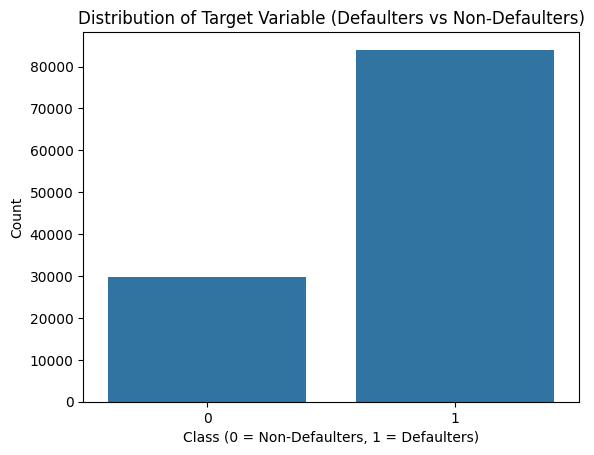

In [8]:
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable (Defaulters vs Non-Defaulters)')
plt.xlabel('Class (0 = Non-Defaulters, 1 = Defaulters)')
plt.ylabel('Count')
plt.show()

In [35]:
df = df.drop('customer_id', axis=1)


In [34]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation with loan_status
correlation_with_loan_status = numeric_columns.corr()['loan_status'].sort_values(ascending=False)

print(correlation_with_loan_status)


loan_status        1.000000
cibil_score        0.053848
annual_inc         0.031050
emp_length         0.026188
account_bal        0.014416
total_no_of_acc   -0.008563
installment       -0.060676
customer_id       -0.094431
loan_amnt         -0.106371
int_rate          -0.278462
Name: loan_status, dtype: float64


<ipython-input-36-3e2408f92a4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_loan_status.index, y=correlation_with_loan_status.values, palette="coolwarm")


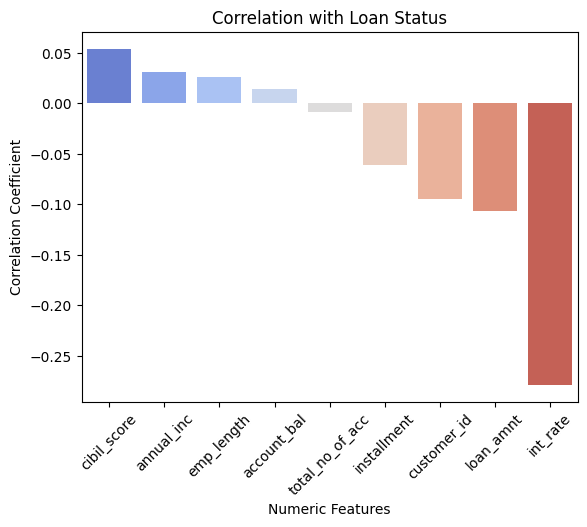

In [36]:
correlation_with_loan_status = correlation_with_loan_status.drop('loan_status')

# Bar Plot
sns.barplot(x=correlation_with_loan_status.index, y=correlation_with_loan_status.values, palette="coolwarm")
plt.title('Correlation with Loan Status')
plt.xlabel('Numeric Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [37]:
df = df.drop('purpose', axis=1)

In [38]:
df = df.drop('application_type', axis=1)

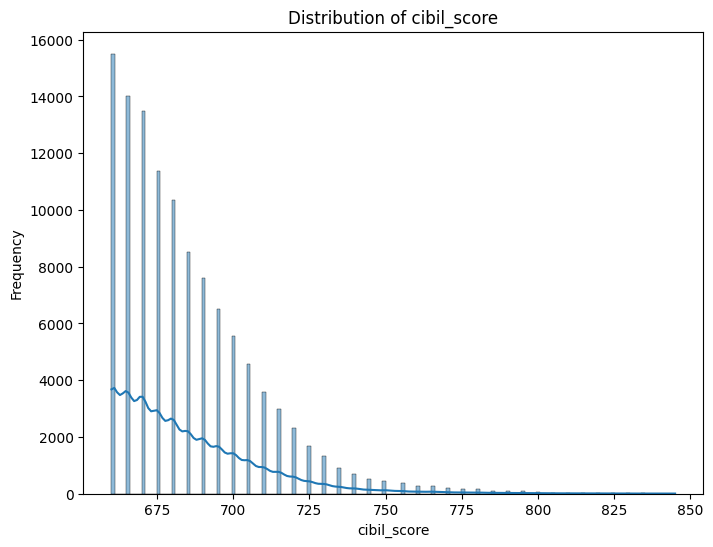

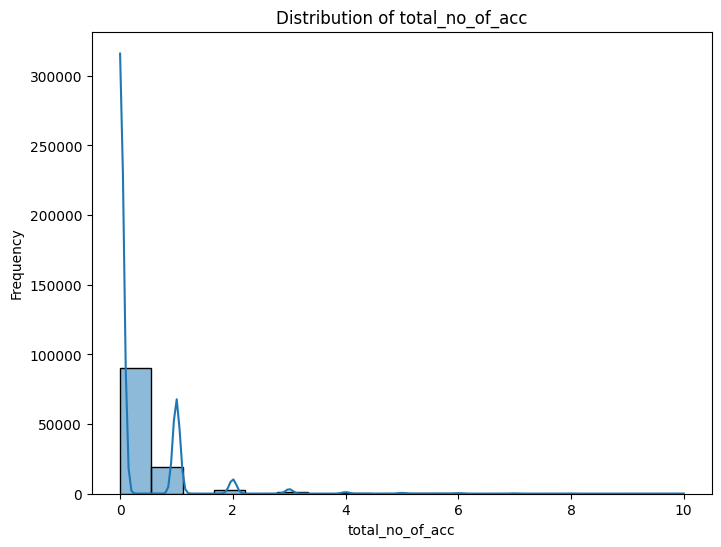

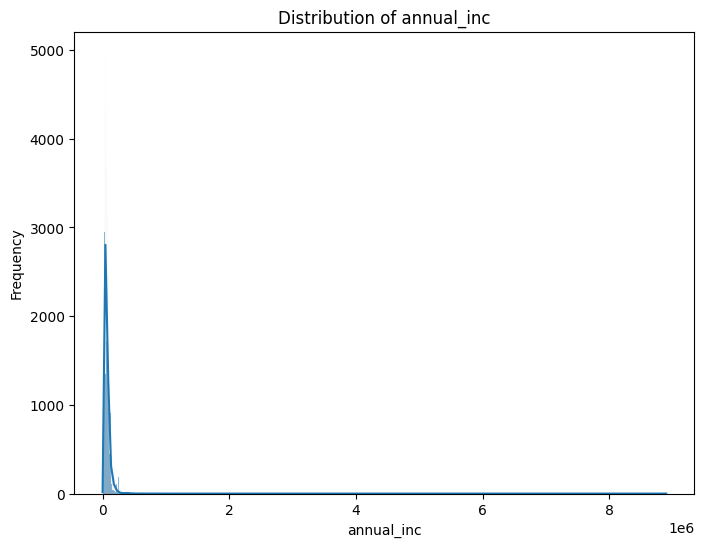

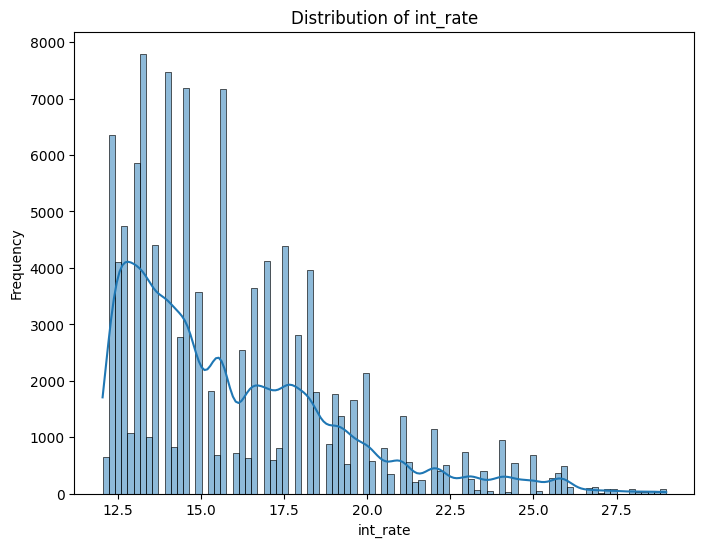

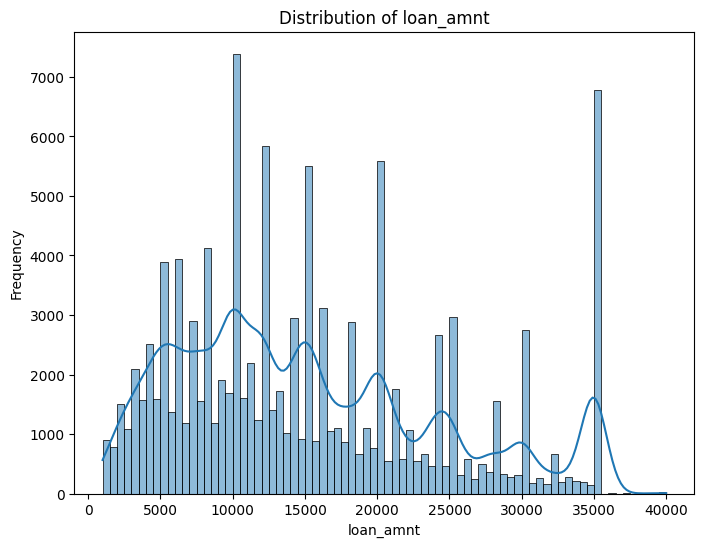

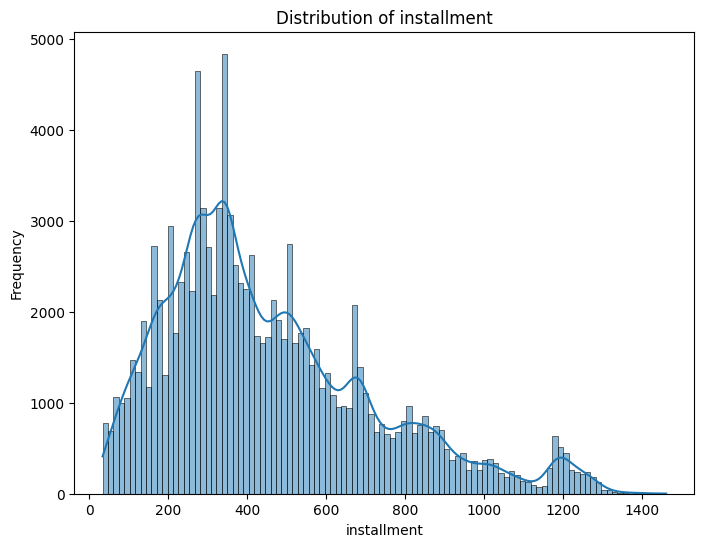

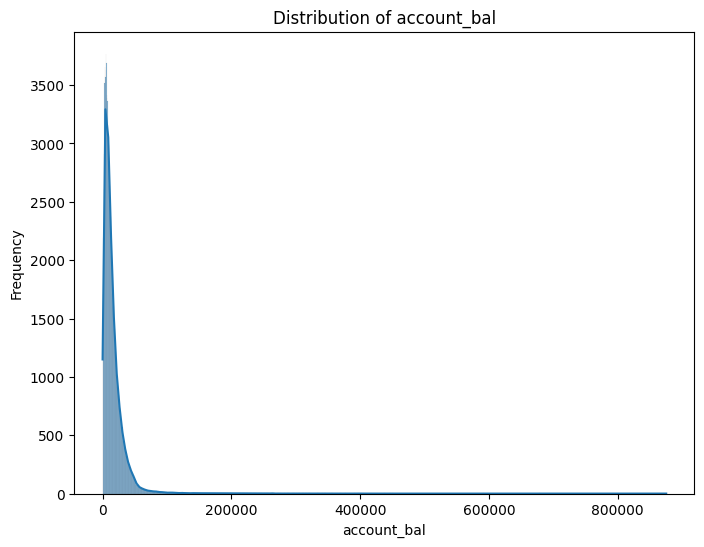

In [39]:
for column in ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

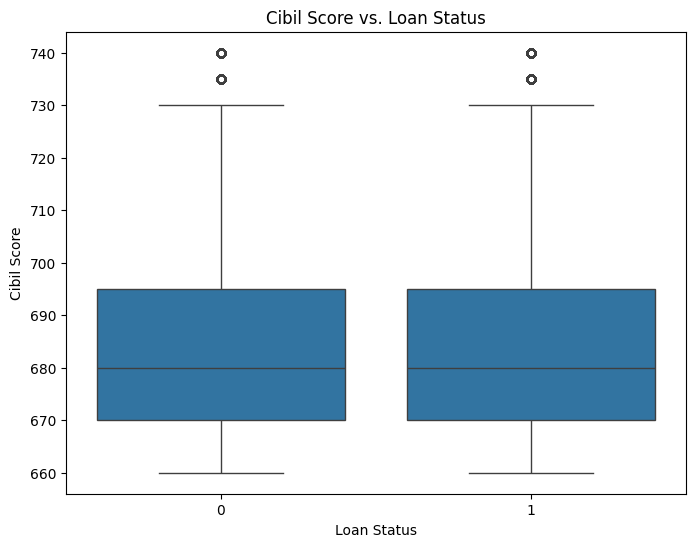

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)  # Assuming 'loan_status' indicates default (e.g., 1 for default, 0 for non-default)
plt.title('Cibil Score vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

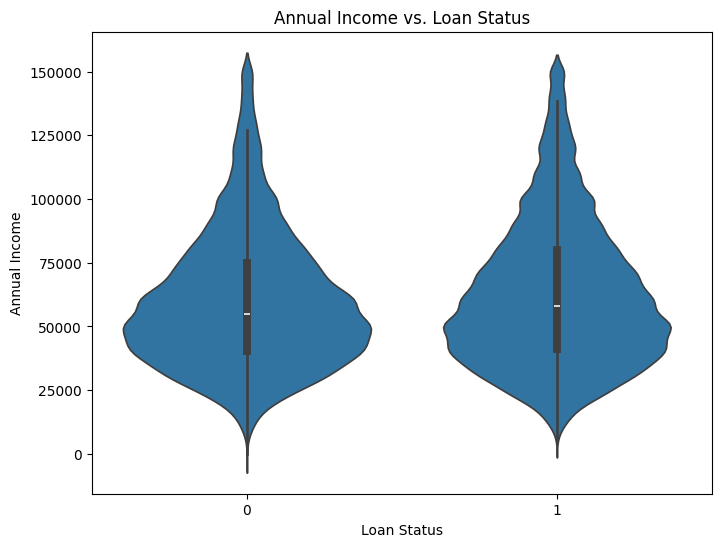

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

In [42]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [47]:
for column in ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal']:
    df = remove_outliers_iqr(df, column)

In [48]:
df.describe()

,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,69177,69177.000000,69177.0,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000
mean,2015-03-01 07:00:35.439524608,683.173309,0.0,59365.909893,15.605776,13447.970062,398.776645,12801.133339,5.754413,0.744106
min,2014-01-01 00:00:00,660.000000,0.0,0.000000,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2014-08-01 00:00:00,670.000000,0.0,40000.000000,13.330000,7500.000000,250.150000,6014.000000,2.000000,0.000000
50%,2015-04-01 00:00:00,680.000000,0.0,55000.000000,14.980000,12000.000000,359.080000,10938.000000,5.000000,1.000000
75%,2015-10-01 00:00:00,695.000000,0.0,75000.000000,17.570000,18475.000000,529.770000,17972.000000,11.000000,1.000000
max,2016-03-01 00:00:00,730.000000,0.0,133532.000000,23.700000,36000.000000,976.400000,37197.000000,11.000000,1.000000
std,NaN,18.102913,0.0,25362.587218,2.711582,7667.008381,206.700597,8551.582446,4.193166,0.436366


In [49]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract loan age
df['loan_age'] = (datetime.now() - df['transaction_date']).dt.days

# Extract year and month
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month

# Drop the original transaction_date if not needed
df.drop('transaction_date', axis=1, inplace=True)

In [50]:
df.head()

,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status,loan_age,transaction_year,transaction_month
695,D1,60 months,MORTGAGE,660,0,40440.0,16.99,17775,441.66,Verified,17264,2,1,3997,2014,1
697,D1,60 months,MORTGAGE,665,0,70000.0,16.99,15600,387.62,Verified,14173,11,1,3997,2014,1
699,C4,36 months,MORTGAGE,675,0,120000.0,15.61,7500,262.24,Not Verified,14051,1,1,3997,2014,1
700,D2,36 months,MORTGAGE,705,0,85000.0,17.57,7800,280.31,Not Verified,8192,11,1,3997,2014,1
701,D1,60 months,RENT,670,0,47000.0,16.99,12000,298.17,Verified,16176,11,0,3997,2014,1


In [51]:

df['sub_grade_alpha'] = df['sub_grade'].str[0]
df['sub_grade_num'] = df['sub_grade'].str[1].astype(int)

grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['sub_grade_alpha'] = df['sub_grade_alpha'].map(grade_map)


df.drop('sub_grade', axis=1, inplace=True)


In [55]:
df.head()

,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status,loan_age,transaction_year,transaction_month,sub_grade_alpha,sub_grade_num
695,60,MORTGAGE,660,0,40440.0,16.99,17775,441.66,1.0,17264,2,1,3997,2014,1,4,1
697,60,MORTGAGE,665,0,70000.0,16.99,15600,387.62,1.0,14173,11,1,3997,2014,1,4,1
699,36,MORTGAGE,675,0,120000.0,15.61,7500,262.24,0.0,14051,1,1,3997,2014,1,3,4
700,36,MORTGAGE,705,0,85000.0,17.57,7800,280.31,0.0,8192,11,1,3997,2014,1,4,2
701,60,RENT,670,0,47000.0,16.99,12000,298.17,1.0,16176,11,0,3997,2014,1,4,1


In [53]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)  # Extract numeric part


In [54]:

df['verification_status'] = df['verification_status'].map({'Verified': 1, 'Source Verified': 0.7, 'Not Verified': 0})




In [56]:
# Combine the alpha and numeric parts into a single value
df['sub_grade_combined'] = (df['sub_grade_alpha'] * 10) + df['sub_grade_num']


In [57]:
df.to_csv('eda_dataset_train.csv', index=False)